In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
filename = './otimizacao_peneasy/release.dat'

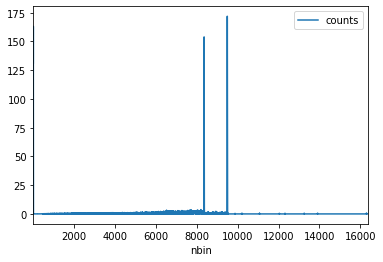

In [3]:
data = {
    'Elow(eV)' : [],
    'Emiddle(eV)' : [],
    'counts(1/eV/hist)' : [],
    '+-2sigma':[],
    'nbin' : []
}

linha_de_dados = False
with open(filename, "r") as f:
    for line in f:
        if line[0] == '#':
            linha_de_dados = False
        else:
            linha_de_dados = True
       
        if linha_de_dados:
            aux = line.split(' ')
            if len(aux) == 2:
                break
            
            data['Elow(eV)'].append(np.fromstring(aux[2], dtype=np.float64, sep=',')[0])
            data['Emiddle(eV)'].append(np.fromstring(aux[4], dtype=np.float64, sep=',')[0])
            q = np.fromstring(aux[6], dtype=np.float64, sep=',')[0]
            data['counts(1/eV/hist)'].append(q)
            data['+-2sigma'].append(np.fromstring(aux[8], dtype=np.float64, sep=',')[0])
            nbin = np.fromstring(aux[9], dtype=np.int, sep=',')[0]
            data['nbin'].append(nbin)      
            
df = pd.DataFrame.from_dict(data)
df['counts'] = df['counts(1/eV/hist)'].values * 1.0e07 * 1 / ((df['Elow(eV)'].shift(-1).fillna(0) - df['Elow(eV)']) / df['nbin'])
df['E'] = df['Elow(eV)'] / 1e3
df.iloc[0:].plot(y='counts',x='nbin')

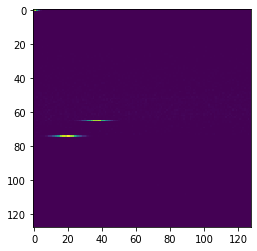

In [4]:
img = df['counts'].values[0:16384].reshape((128,128,1)) / np.max(df['counts'].values)
plt.imshow(img.reshape((128,128)))
plt.show()

In [5]:
filename = './otimizacao_peneasy/debug.dat'

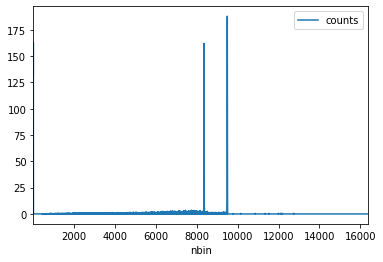

In [6]:
data = {
    'Elow(eV)' : [],
    'Emiddle(eV)' : [],
    'counts(1/eV/hist)' : [],
    '+-2sigma':[],
    'nbin' : []
}

linha_de_dados = False
with open(filename, "r") as f:
    for line in f:
        if line[0] == '#':
            linha_de_dados = False
        else:
            linha_de_dados = True
       
        if linha_de_dados:
            aux = line.split(' ')
            if len(aux) == 2:
                break
            
            data['Elow(eV)'].append(np.fromstring(aux[2], dtype=np.float64, sep=',')[0])
            data['Emiddle(eV)'].append(np.fromstring(aux[4], dtype=np.float64, sep=',')[0])
            q = np.fromstring(aux[6], dtype=np.float64, sep=',')[0]
            data['counts(1/eV/hist)'].append(q)
            data['+-2sigma'].append(np.fromstring(aux[8], dtype=np.float64, sep=',')[0])
            nbin = np.fromstring(aux[9], dtype=np.int, sep=',')[0]
            data['nbin'].append(nbin)      
            
df = pd.DataFrame.from_dict(data)
df['counts'] = df['counts(1/eV/hist)'].values * 1.0e07 * 1 / ((df['Elow(eV)'].shift(-1).fillna(0) - df['Elow(eV)']) / df['nbin'])
df['E'] = df['Elow(eV)'] / 1e3
df.iloc[0:].plot(y='counts',x='nbin')

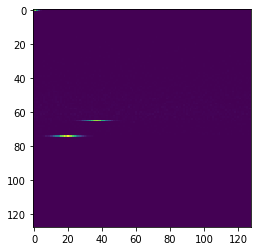

In [7]:
img = df['counts'].values[0:16384].reshape((128,128,1)) / np.max(df['counts'].values)
plt.imshow(img.reshape((128,128)))
plt.show()

In [5]:
import tensorflow as tf
from keras.models import load_model

def accuracy_score_wrapper(label, pred):
    threshold = .5
    label = (label >= threshold).astype(np.uint8)
    pred = (pred >= threshold).astype(np.uint8)
    return np.float32(accuracy_score(label, pred))

def my_accuracy_score(label, pred):
    metric_value = tf.py_func(accuracy_score_wrapper, [label, pred], tf.float32)
    return metric_value

ModuleNotFoundError: No module named 'tensorflow'

In [7]:
from keras import backend as K
K.clear_session()
model = load_model("/export/ipen/artigo/ICDA-3/Espectros/Experimentos/17-Maio-2018/v1-VGG-19-SGD-sigmoid.hdf5",
                  custom_objects={"my_accuracy_score": my_accuracy_score})

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, use
    tf.py_function, which takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    
Instructions for updating:
Use tf.cast instead.


In [40]:
radionuclideos = {0: 'Am-241',
  1: 'Ba-133',
  2: 'Cd-109',
  3: 'Co-57',
  4: 'Co-60',
  5: 'Cs-137',
  6: 'Eu-152',
  7: 'Mn-54',
  8: 'Na-22',
  9: 'Pb-210'}

img = df.counts.shift(800).fillna(0).values[0:16384].reshape((128,128,1))
pred = model.predict(np.array([img]))
df2 = pd.DataFrame({'radionuclideo':list(radionuclideos.values()),
                   'score': pred[0]*100})
df2.sort_values(by='score', ascending=False)

,radionuclideo,score
5,Cs-137,75.567291
0,Am-241,40.807434
6,Eu-152,27.919090
4,Co-60,27.077507
9,Pb-210,24.957705
1,Ba-133,22.042370
3,Co-57,21.864527
8,Na-22,20.497656
7,Mn-54,15.740916
2,Cd-109,12.356335
